In [33]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
# 读入数据
df=pd.read_csv("../data/demo_data/metric/metric_with_event.csv")
df=df[["ts","event","value"]]
df

,ts,event,value
0,2021-01-01 00:00:00,0,2
1,2021-01-01 00:00:05,0,2
2,2021-01-01 00:00:10,0,4
3,2021-01-01 00:00:15,0,3
4,2021-01-01 00:00:20,0,5
...,...,...,...
15861,2021-01-01 22:01:45,0,3
15862,2021-01-01 22:01:50,0,2
15863,2021-01-01 22:01:55,0,2
15864,2021-01-01 22:02:00,0,3


In [5]:
x=df["ts"].values
y_value=df["value"].values
y_event=df["event"].apply(lambda x: 100 if x!="0" else 0).values

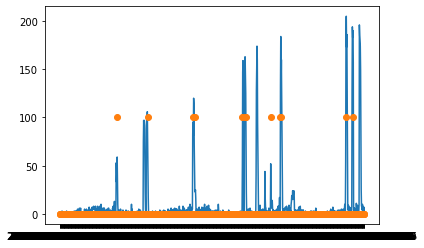

In [6]:
plt.figure()
plt.plot(x[1000:2000],y_value[1000:2000],x[1000:2000],y_event[1000:2000],"o")
plt.show()

In [7]:
# 调整时间的函数
def time_shift(time_str,mins_shift):
    dt2 = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    dt2=dt2 + datetime.timedelta(seconds=60*mins_shift)
    return dt2.strftime("%Y-%m-%d %H:%M:%S")

# 设置完整的时间窗口是10min
# front和rear的时间序列长度为5min
# 获取时间前后的front和rear时间序列的开始结束时间
# front的结束时间和rear的开始时间，都是事件发生的时间
event_meta_info=df[df["event"]!="0"]
event_meta_info["front_end"]=event_meta_info["ts"]
event_meta_info["rear_start"]=event_meta_info["ts"]
event_meta_info["rear_end"]=event_meta_info["ts"].apply(lambda x: time_shift(x,5))
event_meta_info["front_start"]=event_meta_info["ts"].apply(lambda x: time_shift(x,-5))


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,ts,event,value,front_end,rear_start,rear_end,front_start
1186,2021-01-01 01:38:50,1c91756674b441a16c08dc256a614daa,33,2021-01-01 01:38:50,2021-01-01 01:38:50,2021-01-01 01:43:50,2021-01-01 01:33:50
1288,2021-01-01 01:47:20,0293634f699734aeeba17ab1fbc89743,76,2021-01-01 01:47:20,2021-01-01 01:47:20,2021-01-01 01:52:20,2021-01-01 01:42:20
1437,2021-01-01 01:59:45,bc1d83686dd9af169dbaa2f2c9d5f853,95,2021-01-01 01:59:45,2021-01-01 01:59:45,2021-01-01 02:04:45,2021-01-01 01:54:45
1442,2021-01-01 02:00:10,dce7af4973b2c8474cade713c9058fd2,45,2021-01-01 02:00:10,2021-01-01 02:00:10,2021-01-01 02:05:10,2021-01-01 01:55:10
1599,2021-01-01 02:13:15,3dd0e8b527ee458fc1d6d698ab50483f,52,2021-01-01 02:13:15,2021-01-01 02:13:15,2021-01-01 02:18:15,2021-01-01 02:08:15
1607,2021-01-01 02:13:55,bb101765b8c2531c635d0b55de1abaf1,162,2021-01-01 02:13:55,2021-01-01 02:13:55,2021-01-01 02:18:55,2021-01-01 02:08:55
1611,2021-01-01 02:14:15,2f816efca0ac65c39fa293effb36f6c5,71,2021-01-01 02:14:15,2021-01-01 02:14:15,2021-01-01 02:19:15,2021-01-01 02:09:15
1692,2021-01-01 02:21:00,068ae0e9a29b44c475a1bc0797ed0390,52,2021-01-01 02:21:00,2021-01-01 02:21:00,2021-01-01 02:26:00,2021-01-01 02:16:00
1724,2021-01-01 02:23:40,e42878314b4bcfb8df5e0311a9d7f912,133,2021-01-01 02:23:40,2021-01-01 02:23:40,2021-01-01 02:28:40,2021-01-01 02:18:40
1727,2021-01-01 02:23:55,c5cc5463ebe2c0d981624833ebc07947,160,2021-01-01 02:23:55,2021-01-01 02:23:55,2021-01-01 02:28:55,2021-01-01 02:18:55


In [56]:
# 选择需要检验的事件，通过event_id来确定
event_id="1c91756674b441a16c08dc256a614daa"
# 通过event_meta_info获取该事件发生前后的front和rear序列
front_start_time=event_meta_info[event_meta_info["event"]==event_id]["front_start"].values[0]
front_end_time=event_meta_info[event_meta_info["event"]==event_id]["front_end"].values[0]
rear_start_time=event_meta_info[event_meta_info["event"]==event_id]["rear_start"].values[0]
rear_end_time=event_meta_info[event_meta_info["event"]==event_id]["rear_end"].values[0]
front_series=df[(df["ts"]>=front_start_time)&(df["ts"]<front_end_time)]["value"].values
rear_series=df[(df["ts"]>rear_start_time)&(df["ts"]<=rear_end_time)]["value"].values
# 随机采样非异常时间段5min的时间段
random_series_time=df.loc[int(abs(10000*np.random.randn())),"ts"]
random_series_front_start=time_shift(random_series_time,-5)
random_series_front_end=random_series_time
random_series_rear_start=random_series_time
random_series_rear_end=time_shift(random_series_time,5)
random_front_series=df[(df["ts"]>=random_series_front_start)&(df["ts"]<random_series_front_end)]["value"].values
random_rear_series=df[(df["ts"]>random_series_rear_start)&(df["ts"]<=random_series_rear_end)]["value"].values

In [68]:
from statsmodels.stats.weightstats import ttest_ind
res=ttest_ind(random_front_series, front_series)
p_value=res[1]

In [69]:
p_value

0.1452222180379721

In [52]:
df.loc[int(abs(10000*np.random.randn())),"ts"]

'2021-01-01 02:08:05'